<a href="https://colab.research.google.com/github/NataIss/codeforces/blob/main/Codeforces_12_FailedOnFullTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import time

In [ ]:
link='https://codeforces.com/api/contest.list?gym=false'
data = pd.read_json(link)
if data['status'][0]=='OK':
     con = pd.DataFrame.from_records(data['result'])
con['date']=pd.to_datetime(con['startTimeSeconds'],unit='s')
con.set_index('date',inplace=True)
con['Y']=con.index.year
con['div2']=con['name'].str.find('Div. 2')
con['div1']=con['name'].str.find('Div. 1')
con=con[(con['div2']>-1) | (con['div1']>-1) ]
con=con[(con['phase']=='FINISHED') & (con['type']=='CF') & (con['Y']>2011)]
con.shape

(895, 11)

In [ ]:
con.head()

,id,name,type,phase,frozen,durationSeconds,startTimeSeconds,relativeTimeSeconds,Y,div2,div1
date,,,,,,,,,,,
2021-11-14 06:05:00,1588,"Codeforces Round #755 (Div. 1, based on Techno...",CF,FINISHED,False,8100,1636869900,871947,2021,-1,23
2021-11-14 06:05:00,1589,"Codeforces Round #755 (Div. 2, based on Techno...",CF,FINISHED,False,8100,1636869900,871945,2021,23,-1
2021-11-12 14:35:00,1605,Codeforces Round #754 (Div. 2),CF,FINISHED,False,7200,1636727700,1014147,2021,23,-1
2021-10-30 14:35:00,1603,Codeforces Round #752 (Div. 1),CF,FINISHED,False,7200,1635604500,2137347,2021,-1,23
2021-10-30 14:35:00,1604,Codeforces Round #752 (Div. 2),CF,FINISHED,False,7200,1635604500,2137345,2021,23,-1


In [ ]:
link='https://codeforces.com/api/contest.status?contestId=27'
data = pd.read_json(link)
if data['status'][0]=='OK':
     dfAll = pd.DataFrame.from_records(data['result'])
    # dfAll['handle']=j
dfAll.shape

(67227, 12)

In [ ]:
df=pd.concat([dfAll.drop(['author'], axis=1), pd.json_normalize(dfAll['author']).drop(['contestId'], axis=1)], axis=1)
df=pd.concat([df.drop(['problem'], axis=1), pd.json_normalize(df['problem']).drop(['contestId'], axis=1)], axis=1)
df=df[(df['participantType']=='CONTESTANT')] 
df['task']=df['contestId'].apply(str)+','+df['index']+','+df['rating'].apply(str)
p=df.pivot_table('contestId',index='testset',columns='verdict', aggfunc='count')
p=p.fillna(0)
p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


verdict,CHALLENGED,COMPILATION_ERROR,IDLENESS_LIMIT_EXCEEDED,MEMORY_LIMIT_EXCEEDED,OK,PRESENTATION_ERROR,RUNTIME_ERROR,SKIPPED,TIME_LIMIT_EXCEEDED,WRONG_ANSWER
testset,,,,,,,,,,
CHALLENGES,169.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,19.0
PRETESTS,0.0,144.0,6.0,3.0,0.0,242.0,74.0,26.0,4.0,448.0
TESTS,0.0,0.0,0.0,0.0,586.0,64.0,14.0,0.0,23.0,208.0


In [ ]:
#for j in con['id']: 
#    print(j)
#    try:
#            time.sleep(0.2)
#            link='https://codeforces.com/api/contest.status?contestId=' + str(j)
#            data = pd.read_json(link)
#            if data['status'][0]=='OK':
#                dfAll = pd.DataFrame.from_records(data['result'])
#                df=pd.concat([dfAll.drop(['author'], axis=1), pd.json_normalize(dfAll['author']).drop(['contestId'], axis=1)], axis=1)
#                df=pd.concat([df.drop(['problem'], axis=1), pd.json_normalize(df['problem']).drop(['contestId'], axis=1)], axis=1)
#                df=df[(df['participantType']=='CONTESTANT') & (df['testset']=='TESTS')]
#                df=df.fillna(0)
#                df['task']=df['contestId'].apply(str)+','+df['index']+','+df['rating'].apply(str)
#                res=df.pivot_table('contestId',index='task',columns='verdict', aggfunc='count')
#                res=res.fillna(0)
#                a=pd.concat([a,res])
#    except (BaseException) as e:    
#            print("errr")
#            print(e)


1588
1589
1605


In [2]:
#a.to_csv('Codeforces_FullTest.csv')

In [31]:
a=pd.read_csv('Codeforces_FullTest.csv')

In [32]:
a.shape

(4853, 11)

In [33]:
a=a[5:]
a.head(10)

,task,OK,PRESENTATION_ERROR,RUNTIME_ERROR,TIME_LIMIT_EXCEEDED,WRONG_ANSWER,SKIPPED,MEMORY_LIMIT_EXCEEDED,IDLENESS_LIMIT_EXCEEDED,FAILED,COMPILATION_ERROR
5,"1588,A,900",593.0,NaN,1.0,0.0,9.0,4.0,NaN,NaN,NaN,NaN
6,"1588,B,2000",422.0,NaN,0.0,0.0,1.0,3.0,NaN,NaN,NaN,NaN
7,"1588,C,2300",275.0,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN
8,"1588,D,2600",108.0,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
9,"1588,E,3200",8.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
10,"1589,A,800",4756.0,NaN,NaN,0.0,3.0,43.0,0.0,NaN,NaN,NaN
11,"1589,B,1000",3470.0,NaN,NaN,3.0,0.0,32.0,0.0,NaN,NaN,NaN
12,"1589,C,900",3566.0,NaN,NaN,1.0,534.0,83.0,1.0,NaN,NaN,NaN
13,"1589,D,2000",266.0,NaN,NaN,0.0,0.0,5.0,0.0,NaN,NaN,NaN
14,"1589,E,2300",23.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [34]:
a=a.fillna(0)
a.describe()

,OK,PRESENTATION_ERROR,RUNTIME_ERROR,TIME_LIMIT_EXCEEDED,WRONG_ANSWER,SKIPPED,MEMORY_LIMIT_EXCEEDED,IDLENESS_LIMIT_EXCEEDED,FAILED,COMPILATION_ERROR
count,4848.000000,4848.0,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000
mean,1159.323020,0.0,3.390677,14.477310,69.133663,12.448845,0.522896,0.012583,0.000206,0.000413
std,2042.019248,0.0,10.629651,51.719645,163.267157,181.635848,4.262519,0.296542,0.014362,0.020309
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,316.000000,0.0,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1328.250000,0.0,3.000000,8.000000,58.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,14913.000000,0.0,202.000000,1212.000000,2963.000000,12421.000000,185.000000,15.000000,1.000000,1.000000


In [35]:
a['not']=a['RUNTIME_ERROR']+a['TIME_LIMIT_EXCEEDED']+a['WRONG_ANSWER']+a['MEMORY_LIMIT_EXCEEDED']+a['IDLENESS_LIMIT_EXCEEDED']+a['FAILED']+a['COMPILATION_ERROR']


In [36]:
a['notProc']=a['not']/(a['not']+a['OK'])*100

In [37]:
a['notProc'].describe()

count    4846.000000
mean       16.370695
std        22.455324
min         0.000000
25%         0.692941
50%         6.437247
75%        22.727273
max       100.000000
Name: notProc, dtype: float64

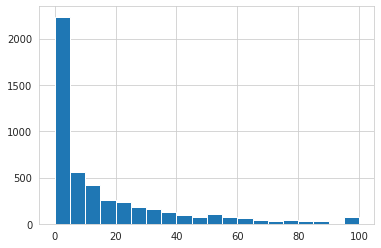

In [38]:
a['notProc'].hist(bins=20)

Text(0, 0.5, 'Failed submissions, %')

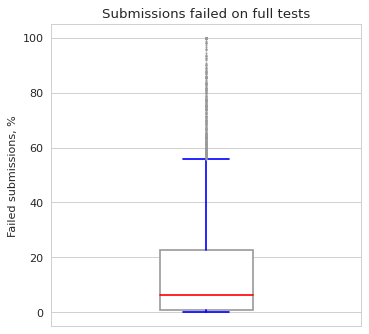

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,5), dpi= 80)
ax=plt.axes()
sns.boxplot(data=a, notch=False, medianprops={'color':'red'},whiskerprops={'color':'blue'},capprops={'color':'blue'}, color="white",fliersize=1,y="notProc", width=0.3)
ax.set_title('Submissions failed on full tests')
ax.set_ylabel('Failed submissions, %')


In [40]:
n=a['task'].str.split(",",expand=True)
n

,0,1,2
5,1588,A,900
6,1588,B,2000
7,1588,C,2300
8,1588,D,2600
9,1588,E,3200
...,...,...,...
4848,141,A,800
4849,141,B,1400
4850,141,C,1800
4851,141,D,2300


In [41]:
n.columns=['contestId','index','rating']

In [42]:
a=pd.concat([a,n],axis=1)
a

,task,OK,PRESENTATION_ERROR,RUNTIME_ERROR,TIME_LIMIT_EXCEEDED,WRONG_ANSWER,SKIPPED,MEMORY_LIMIT_EXCEEDED,IDLENESS_LIMIT_EXCEEDED,FAILED,COMPILATION_ERROR,not,notProc,contestId,index,rating
5,"1588,A,900",593.0,0.0,1.0,0.0,9.0,4.0,0.0,0.0,0.0,0.0,10.0,1.658375,1588,A,900
6,"1588,B,2000",422.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.236407,1588,B,2000
7,"1588,C,2300",275.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.362319,1588,C,2300
8,"1588,D,2600",108.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1588,D,2600
9,"1588,E,3200",8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1588,E,3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,"141,A,800",1180.0,0.0,3.0,2.0,21.0,0.0,0.0,0.0,0.0,0.0,26.0,2.155887,141,A,800
4849,"141,B,1400",572.0,0.0,3.0,0.0,321.0,0.0,0.0,0.0,0.0,0.0,324.0,36.160714,141,B,1400
4850,"141,C,1800",199.0,0.0,6.0,7.0,30.0,0.0,0.0,0.0,0.0,0.0,43.0,17.768595,141,C,1800
4851,"141,D,2300",7.0,0.0,1.0,7.0,3.0,0.0,2.0,0.0,0.0,0.0,13.0,65.000000,141,D,2300


In [43]:
a['notProc'].describe(percentiles=[0.5, 0.95])

count    4846.000000
mean       16.370695
std        22.455324
min         0.000000
50%         6.437247
95%        66.666667
max       100.000000
Name: notProc, dtype: float64

In [44]:
a['rating']=a['rating'].apply(int)

In [45]:
a.groupby('rating')['notProc'].describe(percentiles=[0.5, 0.95])

,count,mean,std,min,50%,95%,max
rating,,,,,,,
800,283.0,1.568424,2.157207,0.000000,0.743982,5.753343,16.240876
900,135.0,4.612890,4.605173,0.000000,3.316198,13.075329,20.245922
1000,149.0,4.771483,4.949419,0.000000,3.504561,14.275703,23.376818
1100,171.0,7.162150,6.836346,0.011242,5.308880,20.695348,29.734009
1200,189.0,8.305118,9.363122,0.000000,4.795737,28.818130,39.374753
1300,197.0,9.612134,11.227667,0.000000,4.707986,33.866604,49.327570
1400,189.0,11.532986,13.222670,0.000000,5.891089,40.124830,55.844156
1500,252.0,14.345958,15.216642,0.000000,8.900977,46.272433,64.275037
1600,307.0,14.757318,16.129237,0.000000,9.333333,48.834906,72.135103


In [46]:
d={2:'800',3:'900-1100',4:'1200-1400',5:'1500-1700',6:'1800-2000',7:'2100-2300',8:'2400-2700', 9:'2700-2900', 10:'3000-3500'}

In [60]:
gr=a.sort_values('rating')

In [61]:
gr['gr']=gr['rating']//300-gr['rating']//3300
gr['prRating']=gr['gr'].map(lambda x : d[x])

In [62]:
gr=gr.groupby('prRating',sort=False)['notProc']
gr.describe()

,count,mean,std,min,25%,50%,75%,max
prRating,,,,,,,,
800,283.0,1.568424,2.157207,0.0,0.088598,0.743982,2.283433,16.240876
900-1100,455.0,5.622898,5.760123,0.0,1.027983,4.135737,8.518679,29.734009
1200-1400,575.0,9.813899,11.435015,0.0,1.004190,5.213270,14.847736,55.844156
1500-1700,846.0,15.319390,16.890296,0.0,1.878474,9.296913,23.317687,77.193559
1800-2000,777.0,19.626106,21.907428,0.0,2.258065,11.111111,29.667897,95.360825
2100-2300,676.0,23.084743,25.840415,0.0,1.965606,12.632546,37.941947,100.000000
2400-2700,582.0,23.075857,28.899124,0.0,0.000000,10.170222,36.056231,100.000000
2700-2900,332.0,19.555993,25.614948,0.0,0.000000,7.477289,33.333333,100.000000
3000-3500,320.0,21.716866,33.936809,0.0,0.000000,0.000000,36.160714,100.000000


In [63]:
df=pd.DataFrame(gr)
df

,0,1
0,800,1250 4.469987 660 0.023778 665 0.20...
1,900-1100,735 0.927835 3856 0.101215 4497 0.22...
2,1200-1400,159 0.700407 2041 19.612315 3555 19...
3,1500-1700,1022 0.994036 1508 0.250878 2296 5...
4,1800-2000,4687 30.630631 605 2.328431 3874 64...
5,2100-2300,3429 0.000000 3099 21.698113 3415 20...
6,2400-2700,936 25.054945 336 40.000000 1419 68...
7,2700-2900,765 0.000000 1267 0.000000 1261 5...
8,3000-3500,2989 75.000000 390 0.000000 1816 ...


In [64]:
df.columns=['group','proc']
df

,group,proc
0,800,1250 4.469987 660 0.023778 665 0.20...
1,900-1100,735 0.927835 3856 0.101215 4497 0.22...
2,1200-1400,159 0.700407 2041 19.612315 3555 19...
3,1500-1700,1022 0.994036 1508 0.250878 2296 5...
4,1800-2000,4687 30.630631 605 2.328431 3874 64...
5,2100-2300,3429 0.000000 3099 21.698113 3415 20...
6,2400-2700,936 25.054945 336 40.000000 1419 68...
7,2700-2900,765 0.000000 1267 0.000000 1261 5...
8,3000-3500,2989 75.000000 390 0.000000 1816 ...


Text(0, 0.5, 'Failed submissions, %')

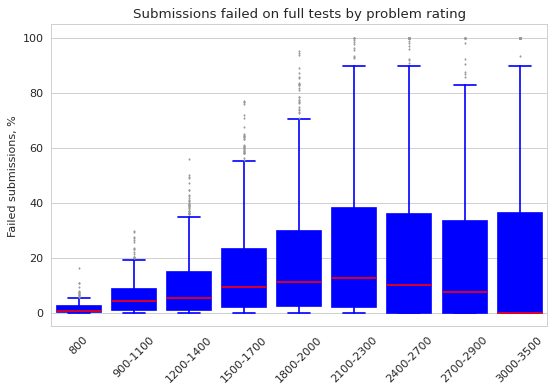

In [66]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,5), dpi= 80)
ax=plt.axes()
cat_par = df['group']
x = np.arange(len(cat_par))

sns.boxplot( data=df['proc'] , notch=False, medianprops={'color':'red'},boxprops={'color':'blue'}, whiskerprops={'color':'blue'},capprops={'color':'blue'}, color="white", flierprops={'color':'gray'}, fliersize=1)
ax.set_xticks(x)
ax.set_xticklabels(cat_par,rotation = 45)
ax.set_title('Submissions failed on full tests by problem rating')
#ax.set_xlabel('Problem rating')
ax.set_ylabel('Failed submissions, %')



